## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP1 - Exploración de los datos

---

En esta libreta se realiza un EDA -básico- de los datos del escenario. 

---

##### Importación de librerías

In [2]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [3]:
df_creditos = pd.read_csv("../../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [4]:
df_tarjetas = pd.read_csv("../../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


----

##### Descripción de los datasets

In [5]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [6]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [7]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


----

##### Obtención de metadatos

In [8]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

# Dataset: datos_creditos

creditos = dt.show(df_creditos)
creditos.open_browser()

2024-04-22 23:25:39,860 - INFO     - Executing shutdown due to inactivity...
2024-04-22 23:25:39,969 - INFO     - Executing shutdown...
2024-04-22 23:25:39,977 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [8]:
# Dataset: datos_tarjetas

tarjetas = dt.show(df_tarjetas)
tarjetas.open_browser()

2024-04-21 20:40:40,164 - ERROR    - Exception occurred while processing request: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
Traceback (most recent call last):
  File "c:\Users\MCristancho\Documents\BrinsaAprende\Personal\Maestria\Metodologias\.venv\Lib\site-packages\dtale\views.py", line 119, in _handle_exceptions
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\MCristancho\Documents\BrinsaAprende\Personal\Maestria\Metodologias\.venv\Lib\site-packages\dtale\views.py", line 3135, in get_column_analysis
    return jsonify(**analysis.build())
                     ^^^^^^^^^^^^^^^^
  File "c:\Users\MCristancho\Documents\BrinsaAprende\Personal\Maestria\Metodologias\.venv\Lib\site-packages\dtale\column_analysis.py", line 141, in build
    return_data, code = self.analysis.build(self)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Us

----

##### Gráficos de interés

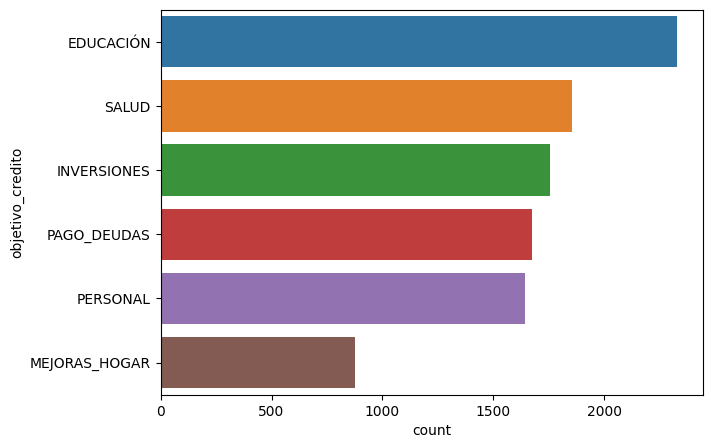

In [9]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_creditos['objetivo_credito'], order=df_creditos['objetivo_credito'].value_counts().index)
plt.show()

In [10]:
df_creditos=df_creditos[df_creditos['edad'] != 144]
df_creditos=df_creditos[df_creditos['edad'] != 123]
totales=df_creditos.groupby('edad')['ingresos'].count()
totales

edad
20       6
21     799
22    2228
23    2190
24    1926
25    1646
26    1328
Name: ingresos, dtype: int64

Text(0.5, 1.0, 'Ingresos en funcion de las edades')

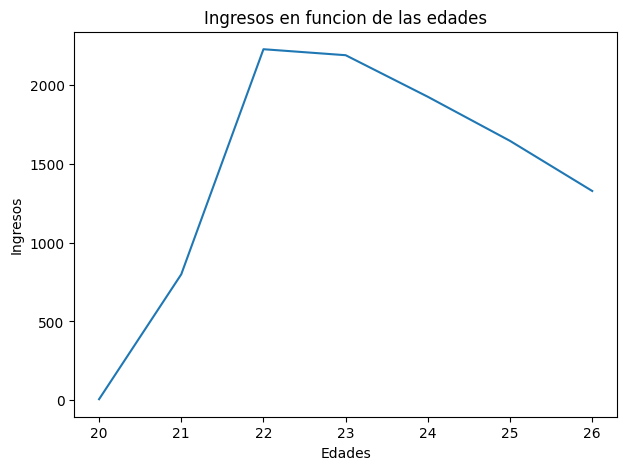

In [11]:
plt.figure(figsize=(7,5))
totales=df_creditos.groupby('edad')['ingresos'].count()
totales
sns.lineplot(x=totales.index, y=totales)

# Etiquetas y título
plt.xlabel('Edades')
plt.ylabel('Ingresos')
plt.title('Ingresos en funcion de las edades')

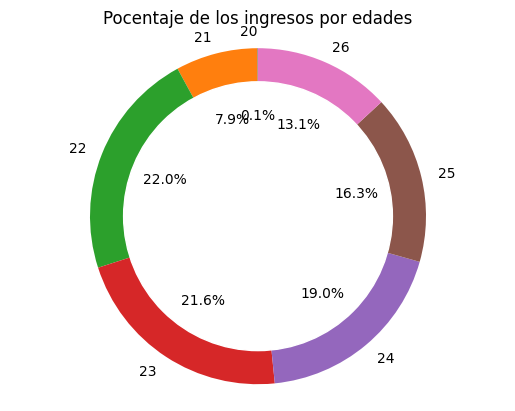

<Figure size 4000x5000 with 0 Axes>

In [12]:
plt.pie(totales, labels=totales.index, autopct='%1.1f%%', startangle=90)
# Añadir un círculo en el centro para hacerlo parecer más como un gráfico de "Part to Whole"
centro_circulo = plt.Circle((0, 0), 0.80, color='white')
plt.gca().add_artist(centro_circulo)
# Ajustar aspectos visuales
plt.axis('equal')
plt.title("Pocentaje de los ingresos por edades")
plt.figure(figsize=(40, 50))
# Mostrar el gráfico
plt.tight_layout()
plt.show()

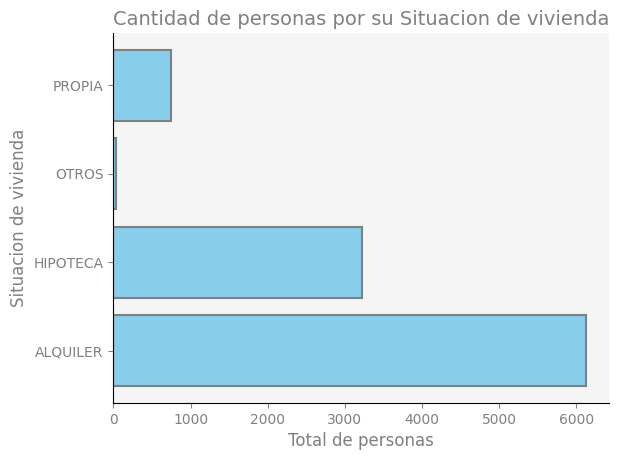

In [13]:
totales=df_creditos.groupby('situacion_vivienda')['id_cliente'].count()
fig, ax = plt.subplots()
# Graficar barras horizontales
bars = ax.barh(totales.index, totales, color='skyblue')
# Personalizar el estilo de las barras
for bar in bars:
    bar.set_edgecolor('gray')  # Color del borde
    bar.set_linewidth(1.5)      # Grosor del borde

# Eliminar los bordes de los ejes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Personalizar los ejes
ax.tick_params(axis='x', colors='gray')  # Color de las marcas en el eje x
ax.tick_params(axis='y', colors='gray')  # Color de las marcas en el eje y
ax.xaxis.label.set_color('gray')         # Color del texto del eje x
ax.yaxis.label.set_color('gray')         # Color del texto del eje y
# Agregar títulos
plt.title('Cantidad de personas por su Situacion de vivienda', color='gray', fontsize=14) # Título principal
plt.xlabel('Total de personas', color='gray', fontsize=12)                      # Título del eje x
plt.ylabel('Situacion de vivienda', color='gray', fontsize=12)                      # Título del eje y
# Personalizar el fondo
ax.set_facecolor('whitesmoke')